## Importing libraries and data

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import scipy.stats
sns.set_theme(font_scale=1.5)
from pycaret.regression import setup, compare_models
from sklearn.ensemble import GradientBoostingRegressor

In [99]:
train=pd.read_csv('train_v9rqX0R.csv')
test=pd.read_csv('test_AbJTz2l.csv')
sample=pd.read_csv('sample_submission_8RXa3c6.csv')

In [100]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [101]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [102]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [103]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Item_Identifier    5681 non-null   object
 1   Outlet_Identifier  5681 non-null   object
 2   Item_Outlet_Sales  5681 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 133.3+ KB


## EDA

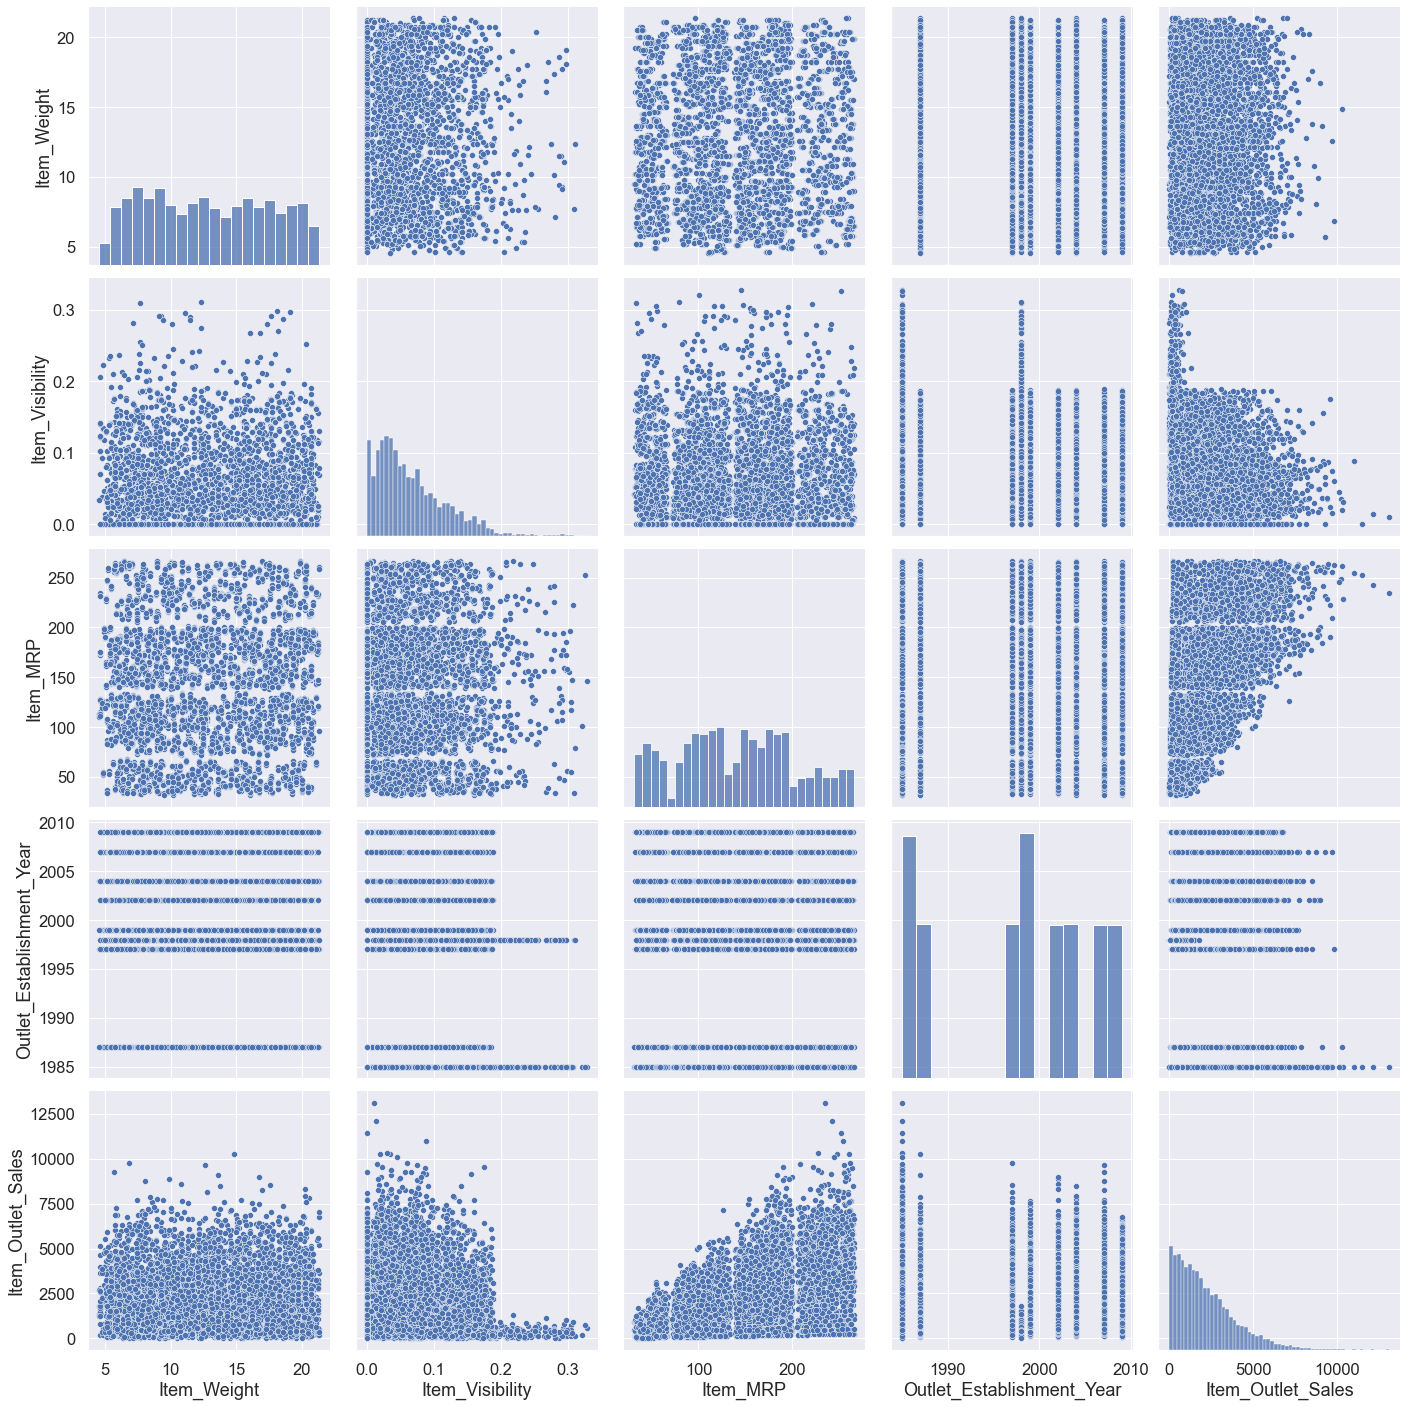

In [104]:
sns.pairplot(data=train,height=4)

In [105]:
train.select_dtypes(['O'])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


### Univariate

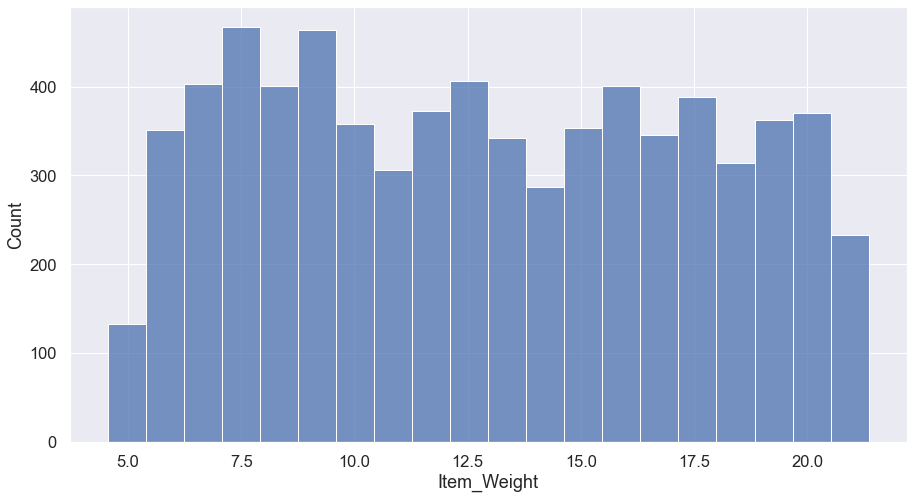

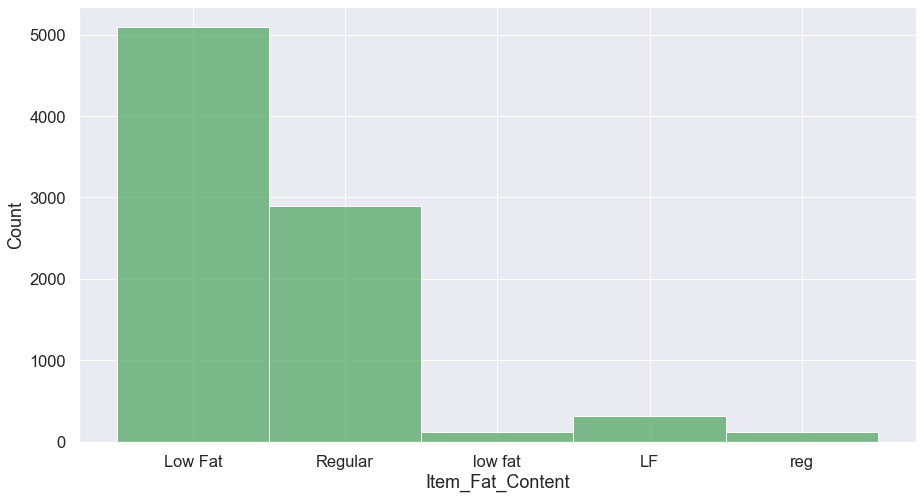

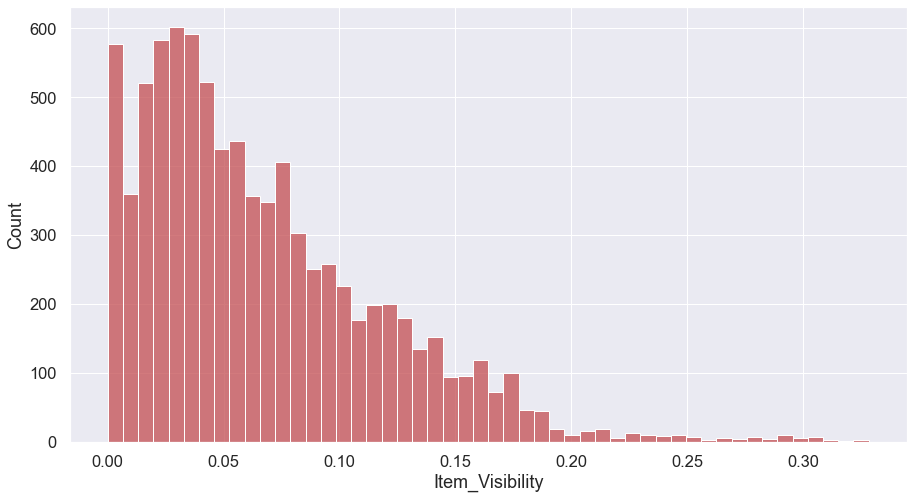

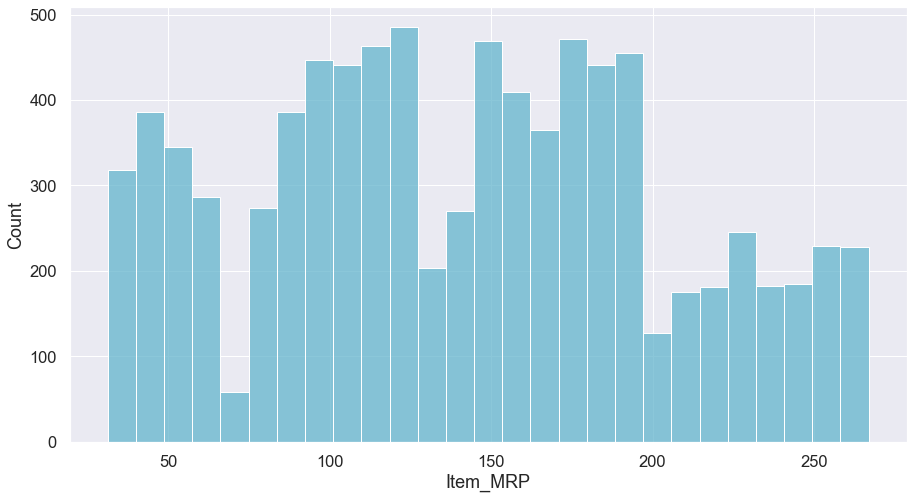

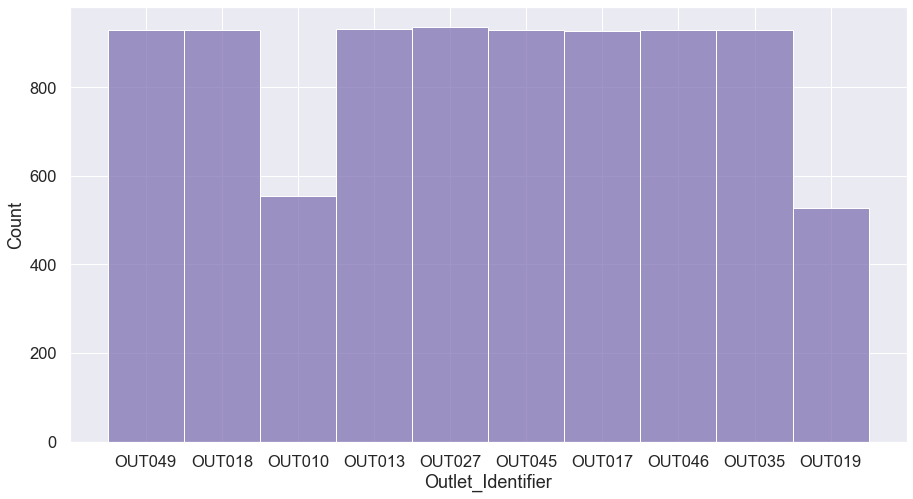

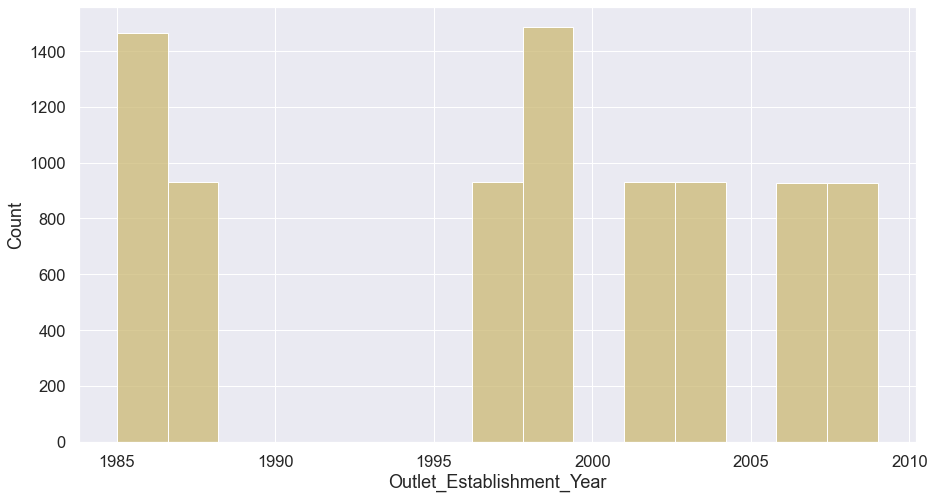

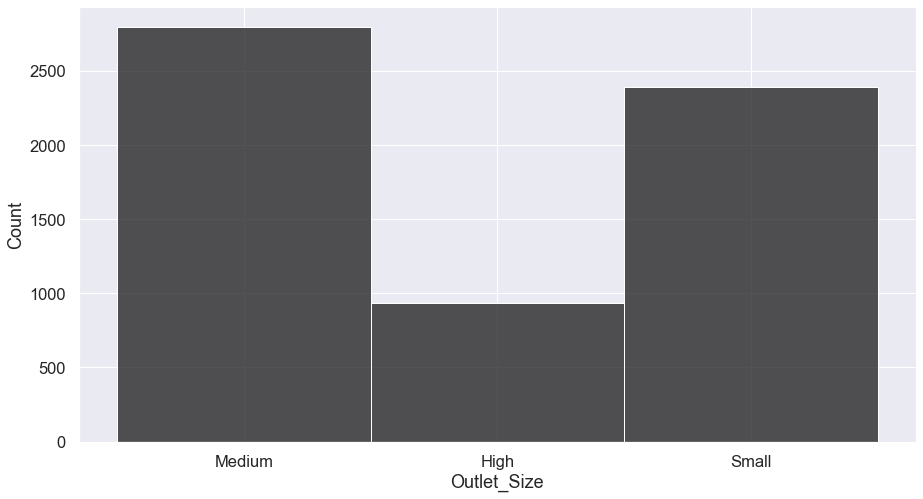

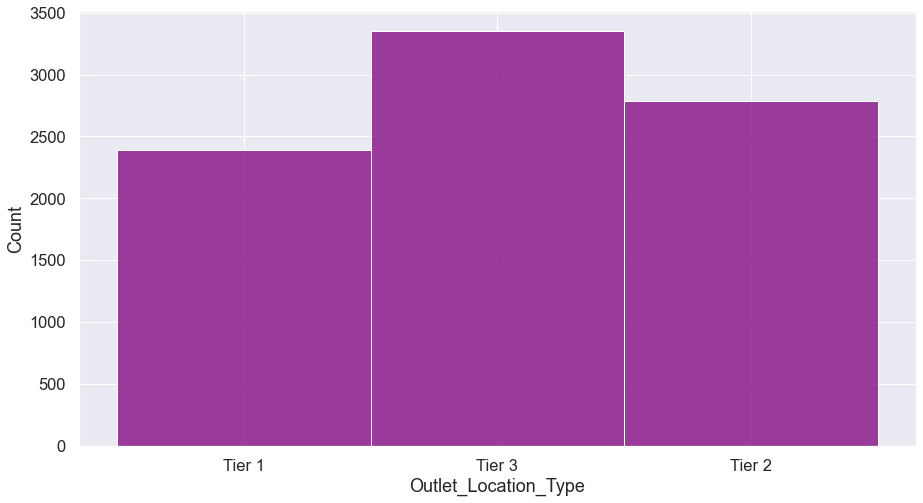

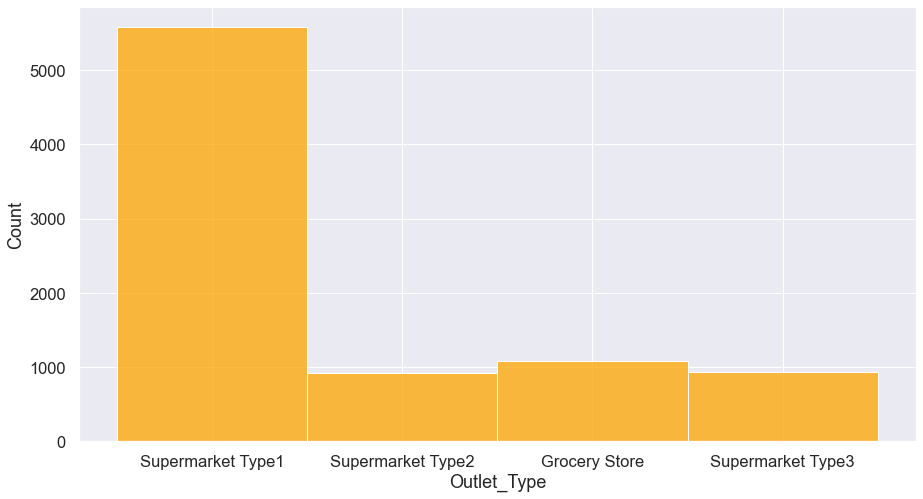

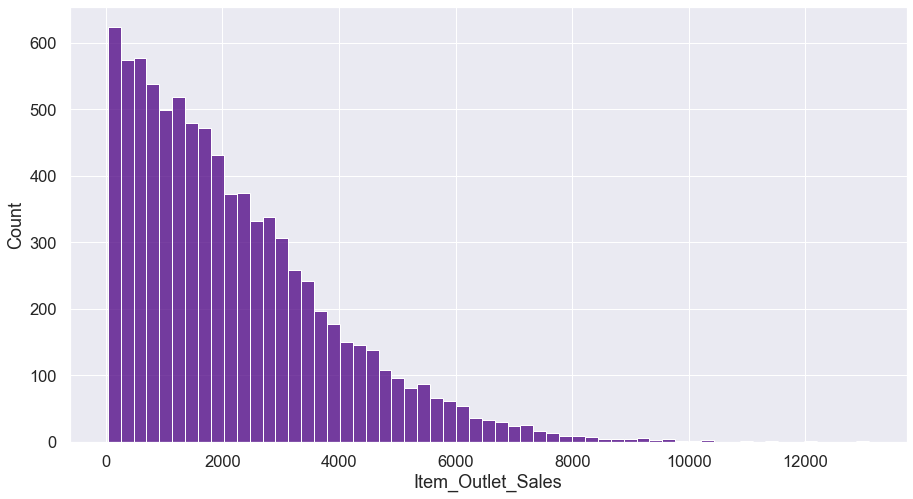

In [106]:
colors=['b','g','r','c','m','y','k','purple','orange','indigo']
for i,col in enumerate(train.drop(['Item_Identifier','Item_Type'],axis=1).columns):
    plt.figure(figsize=(15,8))
    sns.histplot(x=col,data=train,color=colors[i])
    plt.show()

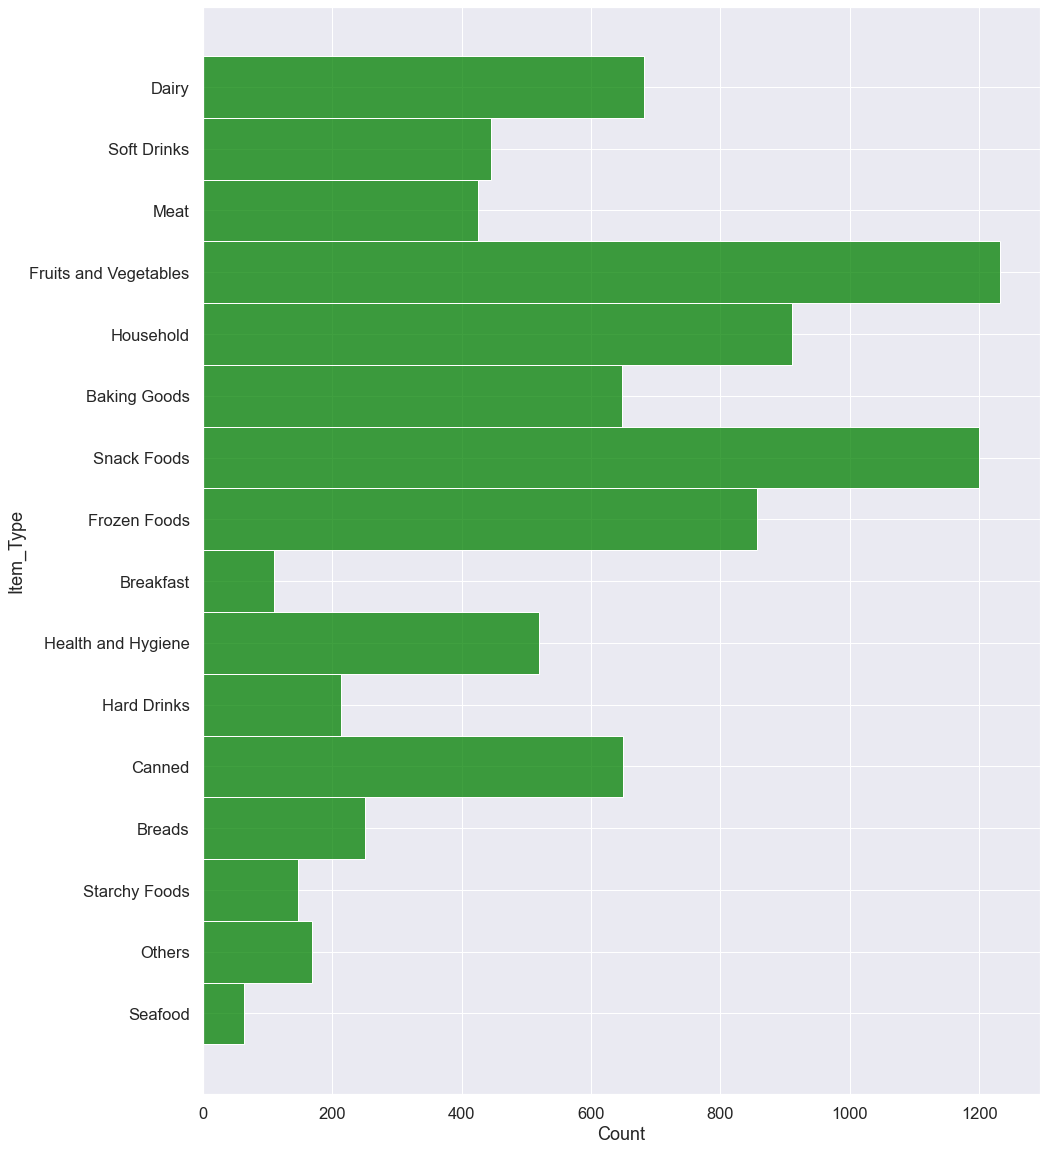

In [107]:
plt.figure(figsize=(15,20))
sns.histplot(y='Item_Type',data=train,color='green')
plt.show()

### Log Transform on Numerical fields

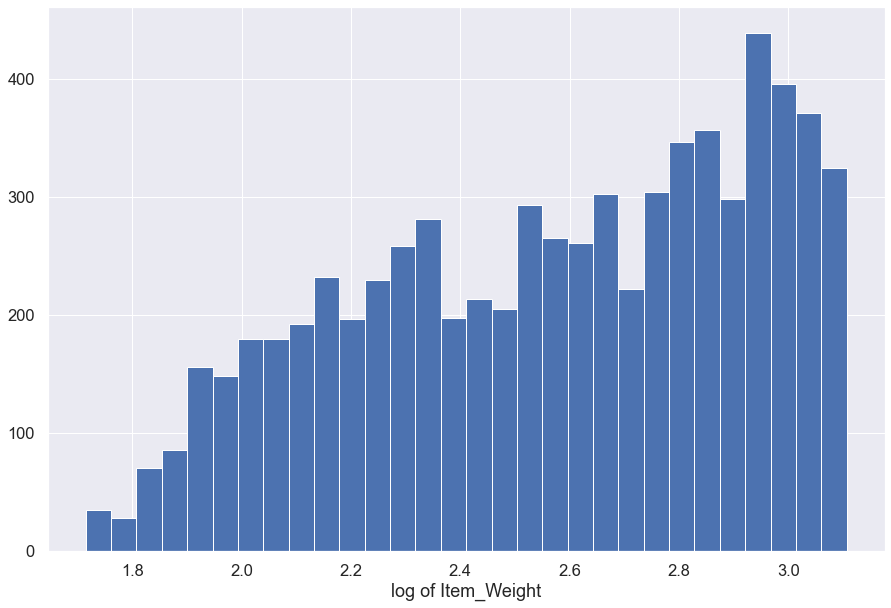

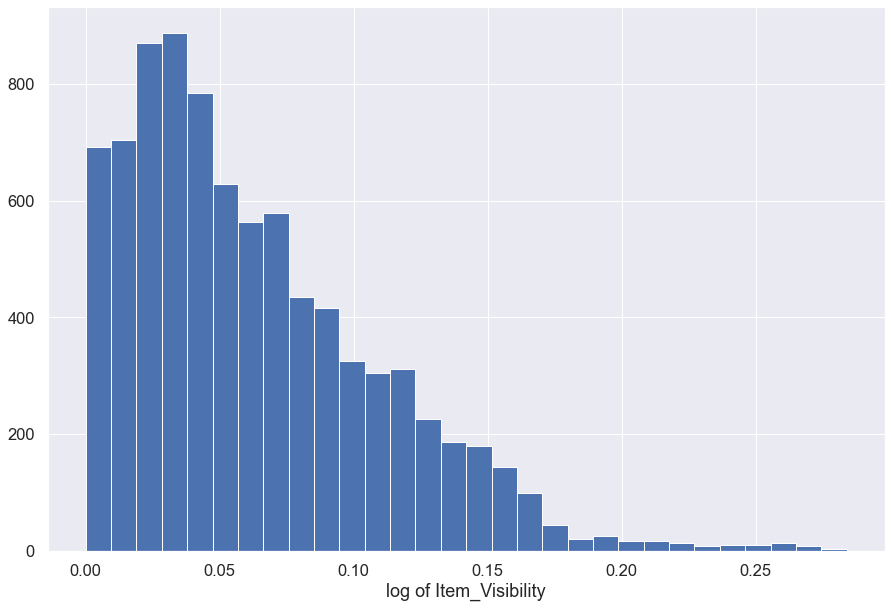

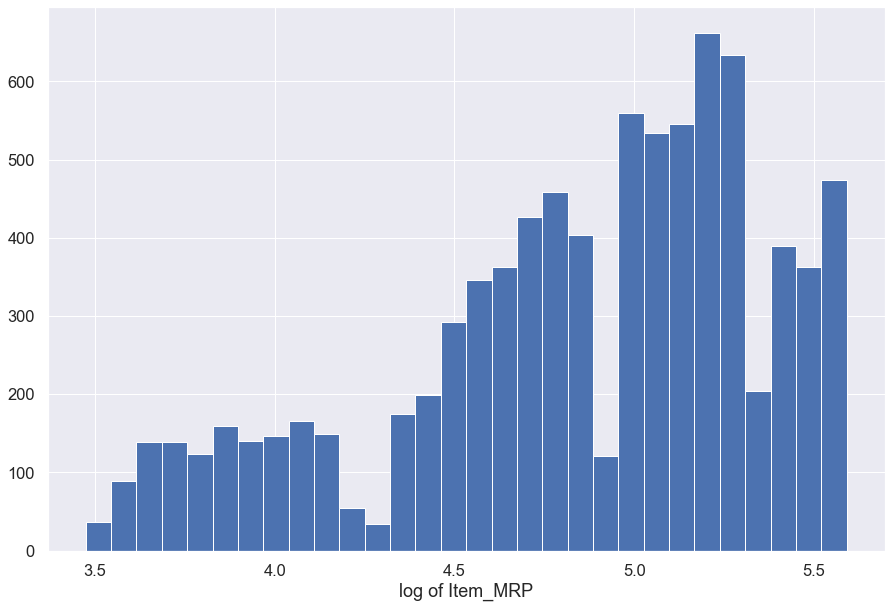

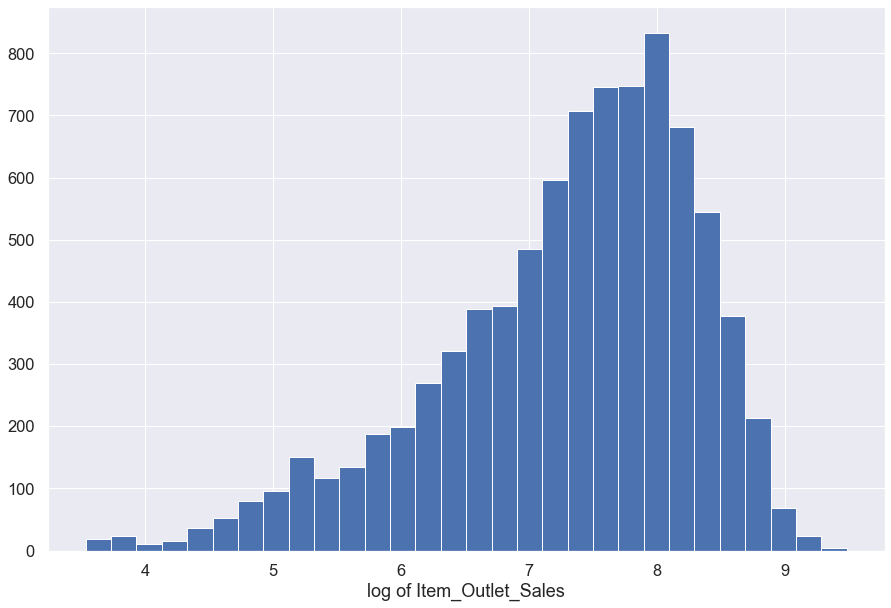

In [108]:
for col in train.drop('Item_Identifier',axis=1).columns:
    if train[col].nunique()>40:
        sns.set_style('darkgrid')
        plt.figure(figsize=(15,10))
        train[col].apply(np.log1p).hist(bins=30)
        plt.xlabel('log of '+col)

### Bivariate w.r.t Item_Outlet_Sales

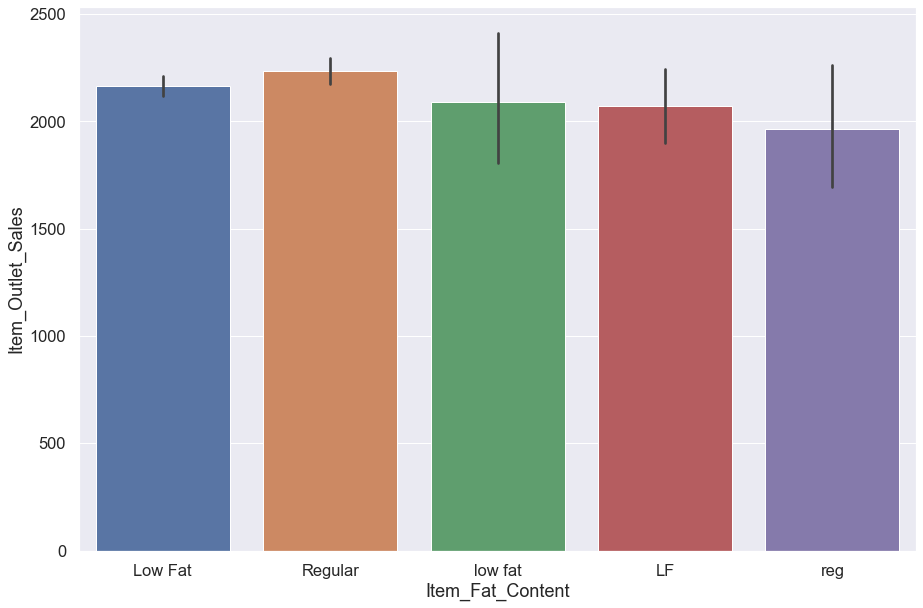

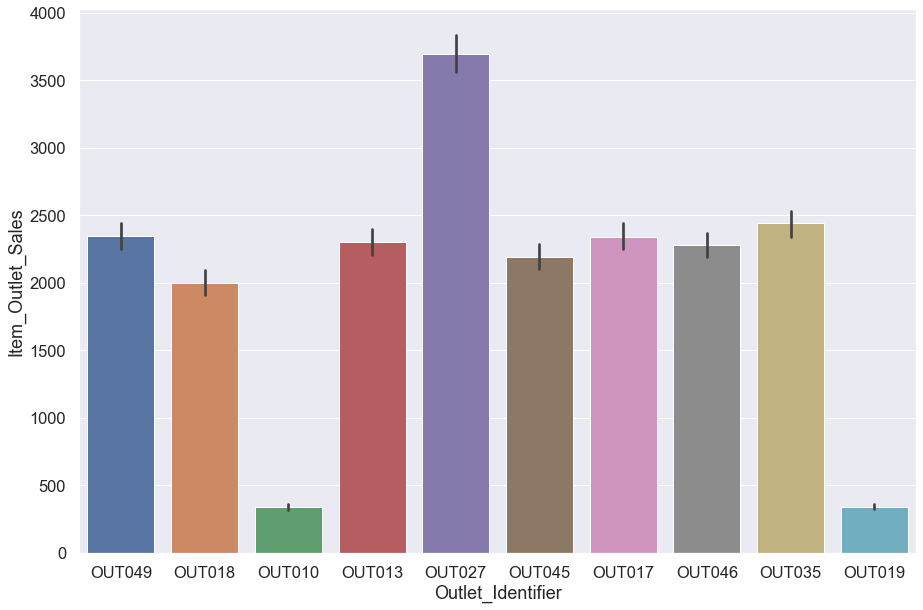

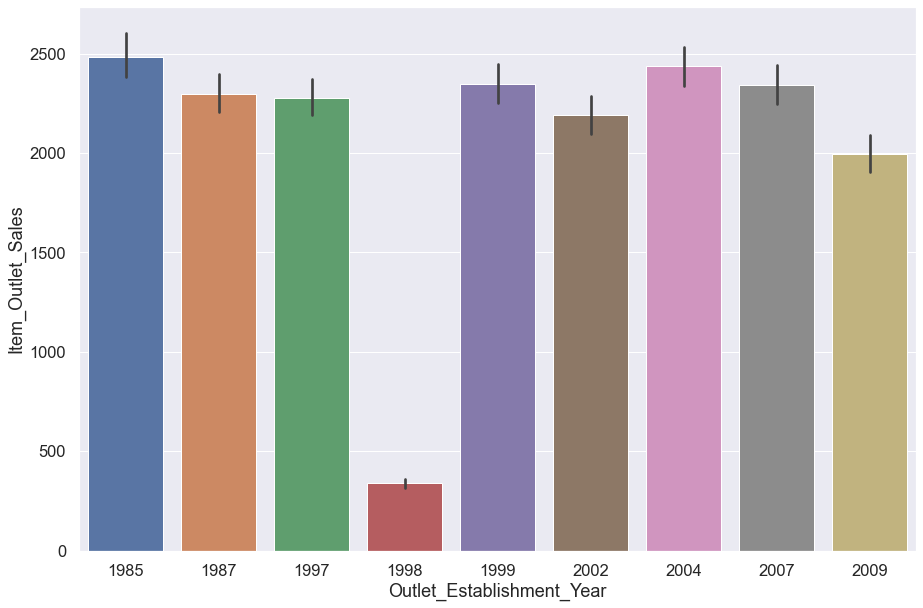

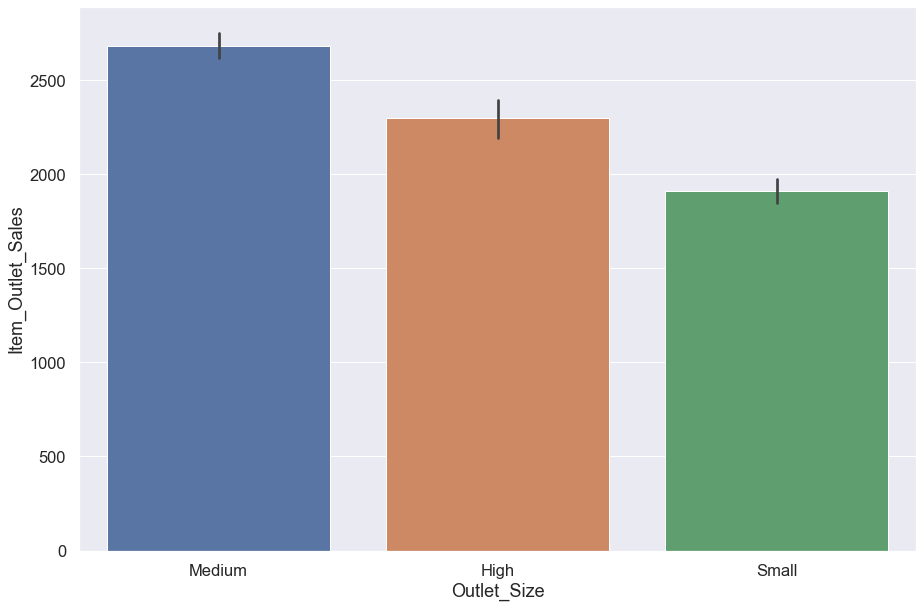

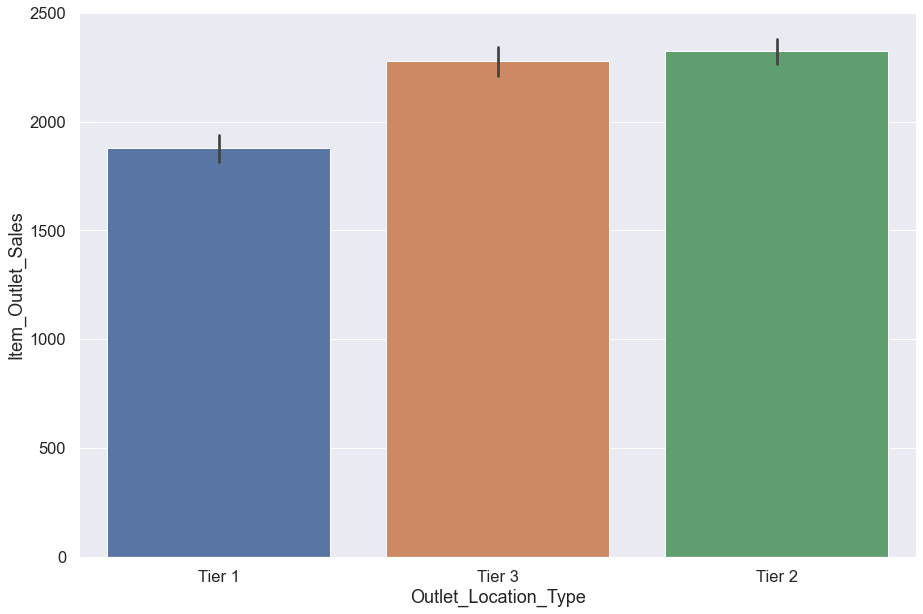

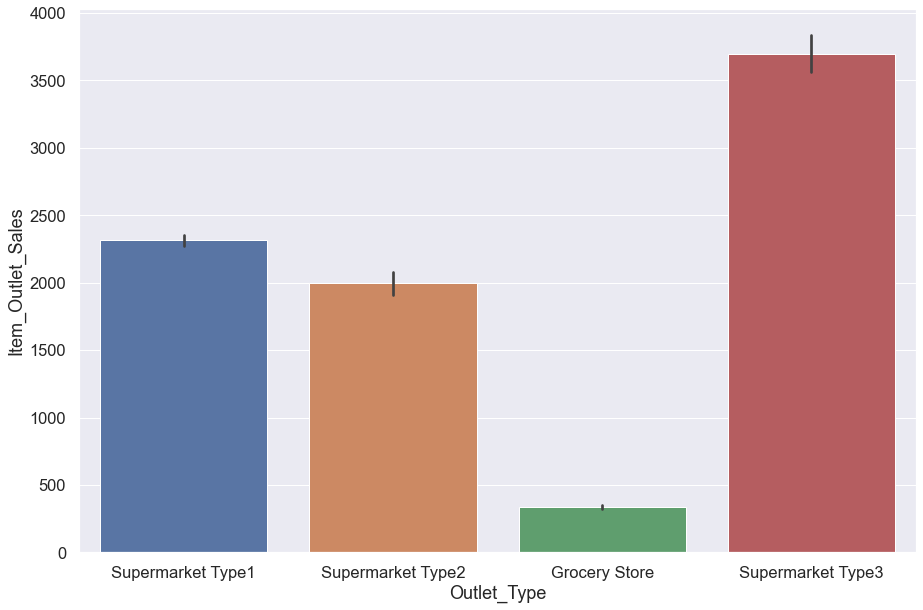

In [109]:
for i,col in enumerate(train.columns):
    if train[col].nunique()<15:
        plt.figure(figsize=(15,10))
        sns.barplot(x=col,y='Item_Outlet_Sales',data=train,estimator=np.mean)
        plt.show()

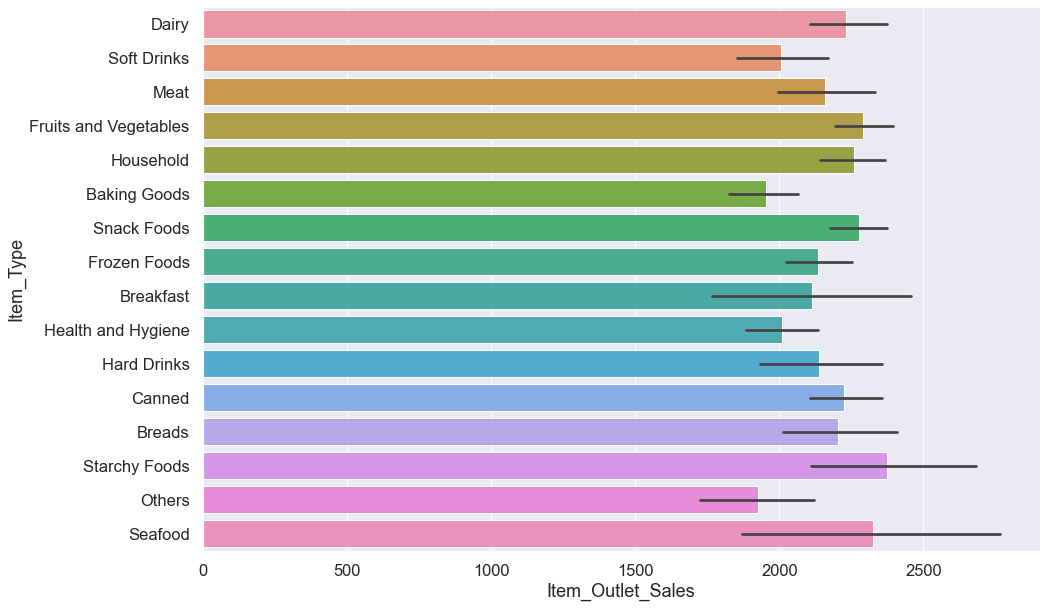

In [110]:
plt.figure(figsize=(15,10))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=train,estimator=np.mean)
plt.show()

### Trivariate EDA

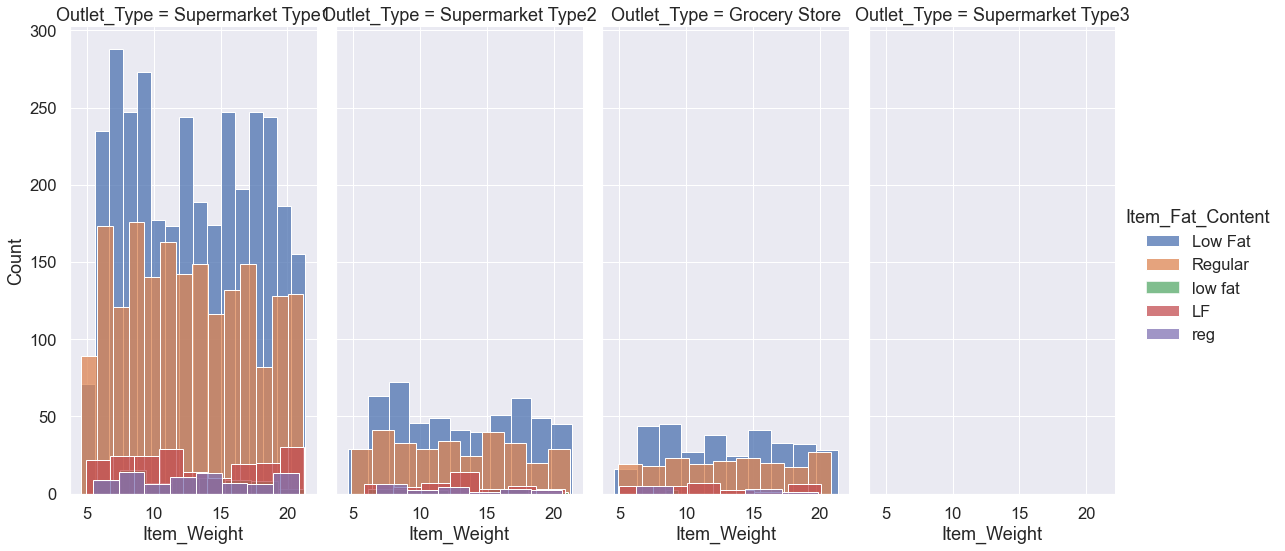

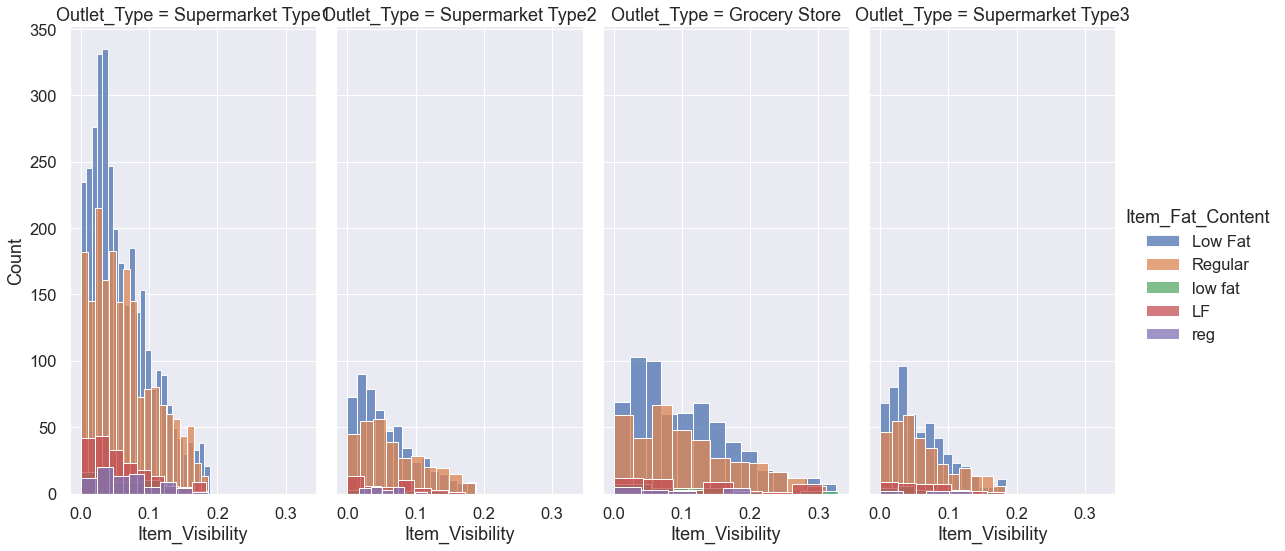

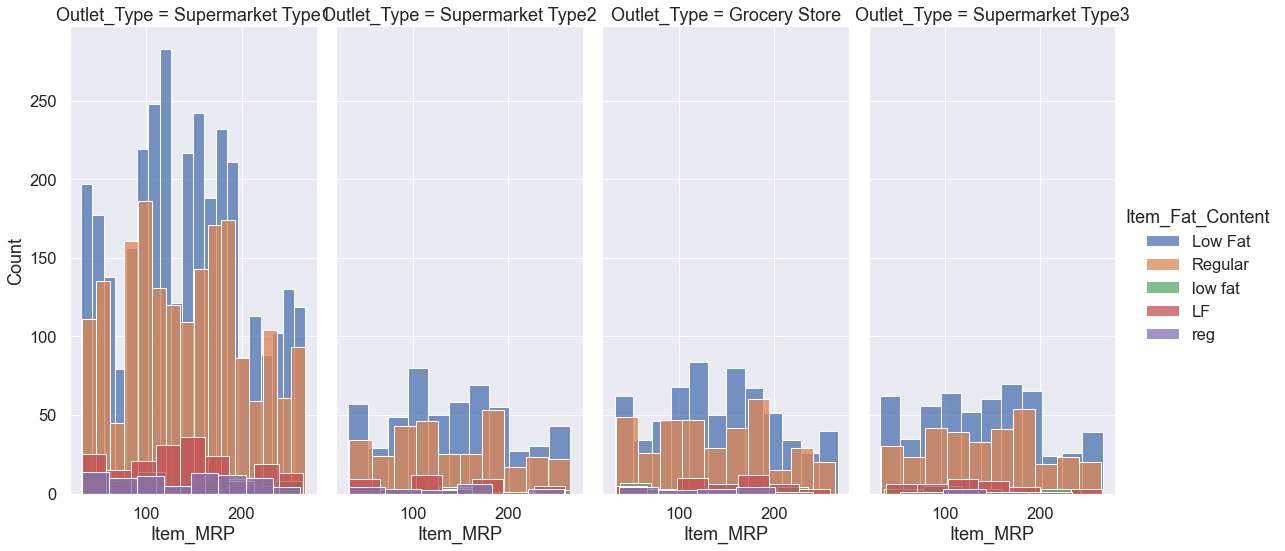

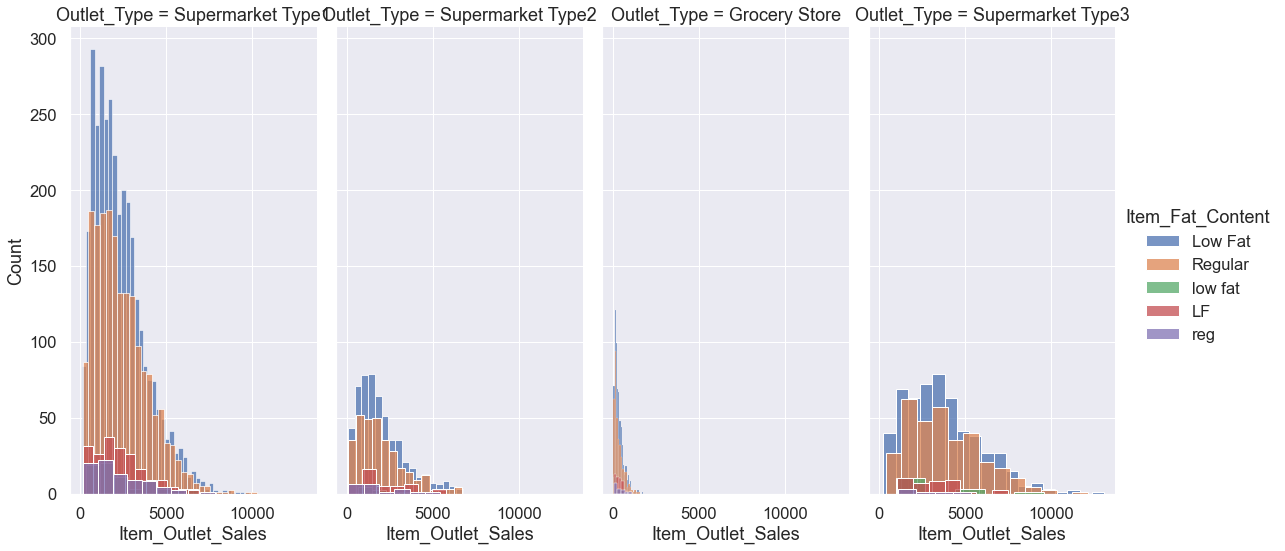

In [111]:

for col in train.drop('Item_Identifier',axis=1).loc[:,train.nunique()>40].columns:
    g=sns.FacetGrid(train, hue='Item_Fat_Content',col='Outlet_Type',height=8,aspect=0.5)
    g.map(sns.histplot,col)
    g.add_legend()
    plt.show()

## Data Cleaning

### Merging train and test data

In [112]:
data0=pd.concat([train.drop('Item_Outlet_Sales',axis=1),test],axis=0)

In [113]:
print('\033[1mThe size of total data:',len(data0))

The size of total data: 14204


### Removing errelevant columns

In [114]:
data1=data0.copy()

In [115]:
[col for col in data1.select_dtypes('O') if data1[col].nunique()>10]

['Item_Identifier', 'Item_Type']

In [116]:
data1.Item_Identifier.nunique()

1559

In [117]:
data1.Item_Type.nunique()

16

In [118]:
data1.drop('Item_Identifier',axis=1,inplace=True)

### Removing incorrect and duplicate labels

In [119]:
data2=data1.copy()

In [120]:
data2.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [121]:
data2.loc[(data2['Item_Fat_Content'] == 'LF') | (data2['Item_Fat_Content'] == 'low fat'),'Item_Fat_Content']='Low Fat'
data2.loc[(data2['Item_Fat_Content'] == 'reg') ,'Item_Fat_Content']='Regular'

In [122]:
data2.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

### Checking for nulls

In [123]:
data2.isnull().sum()

Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

**Total numer of nulls**

In [124]:
data2.isnull().sum().sum()

6455

**Number of rows with missing values**

In [125]:
len(data2)-len(data2.dropna(thresh=11))

14204

**Therefore no row with both Item Weight and Outlet Size missing**

In [126]:
len(data2[['Item_Weight','Outlet_Size']].dropna(thresh=1))

14204

In [127]:
data2[data2['Item_Weight'].isna()]['Outlet_Type'].value_counts()

Supermarket Type3    1559
Grocery Store         880
Name: Outlet_Type, dtype: int64

In [128]:
data2['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

**Item Weight is missing for all of Supermarket Type3, and for some of Grocery Store**

In [129]:
data2[data2['Outlet_Size'].isna()]['Outlet_Type'].value_counts()

Supermarket Type1    3091
Grocery Store         925
Name: Outlet_Type, dtype: int64

**Outlet Size is missing for only some of Supermarket Type 1 and Grocery Store**

In [130]:
data2['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

### Fillna using RandomForest

#### Filling Item_Weight

In [131]:
round(data2['Item_Weight'].mean(),4)

12.7929

In [132]:
data3=data2.copy()

In [133]:
data3.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [134]:
Item_cols=['Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP']
Item_Weight_X=data3[Item_cols].drop('Item_Weight',axis=1)

In [135]:
Item_Weight_X=pd.get_dummies(Item_Weight_X,drop_first=True)

In [136]:
Item_Weight_X_train=Item_Weight_X[data3['Item_Weight'].notna()]
Item_Weight_X_test=Item_Weight_X[data3['Item_Weight'].isna()]
Item_Weight_y_train=data3[data3['Item_Weight'].notna()]['Item_Weight']

In [137]:
ranfr=RandomForestRegressor(200)
ranfr.fit(Item_Weight_X_train,Item_Weight_y_train)
Item_Weight_y_test=ranfr.predict(Item_Weight_X_test)

In [138]:
data3.loc[data3['Item_Weight'].isna(),'Item_Weight']=Item_Weight_y_test

In [139]:
data3.isna().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [140]:
round(data3['Item_Weight'].mean(),4)

12.7943

**Mean of distribution of Item_Weight didnt change. So filling metho unbiased**

#### Filling Outlet_Size

In [141]:
data4=data3.copy()

In [142]:
data4.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [143]:
Outlet_cols=['Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']
Outlet_Size_X=data4[Outlet_cols].drop('Outlet_Size',axis=1)

In [144]:
Outlet_Size_X=pd.get_dummies(Outlet_Size_X,drop_first=True)

In [145]:
Outlet_Size_X_train=Outlet_Size_X[data4['Outlet_Size'].notna()]
Outlet_Size_X_test=Outlet_Size_X[data4['Outlet_Size'].isna()]
Outlet_Size_y_train=data4.loc[data4['Outlet_Size'].notna(),'Outlet_Size']

In [146]:
ranfr=RandomForestClassifier(200)
ranfr.fit(Outlet_Size_X_train,Outlet_Size_y_train)
Outlet_Size_y_test=ranfr.predict(Outlet_Size_X_test)

In [147]:
data4.loc[data4['Outlet_Size'].isna(),'Outlet_Size']=Outlet_Size_y_test

In [148]:
data4.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [149]:
data3.Outlet_Size.value_counts(normalize=True)

Medium    0.456910
Small     0.390656
High      0.152434
Name: Outlet_Size, dtype: float64

In [150]:
data4.Outlet_Size.value_counts(normalize=True)

Small     0.497818
Medium    0.392847
High      0.109335
Name: Outlet_Size, dtype: float64

**Ratio of distribution of Outlet_Size changed. Why?**

In [151]:
pd.Series(Outlet_Size_y_test).value_counts()

Small     3091
Medium     925
dtype: int64

#### Because predicted values to fill na contained only two out of three labels. Why is 'High' missing?

**Check amount of correlation between Outlet_Size and other Outlet variables**

In [152]:
Outlet_cols_df=data2[Outlet_cols]
Outlet_cols_df=pd.get_dummies(Outlet_cols_df,drop_first=True)

In [153]:
Outlet_cols_df.corr()[['Outlet_Size_Medium','Outlet_Size_Small']]

,Outlet_Size_Medium,Outlet_Size_Small
Outlet_Establishment_Year,-0.016534,-0.056481
Outlet_Size_Medium,1.000000,-0.435624
Outlet_Size_Small,-0.435624,1.000000
Outlet_Location_Type_Tier 2,-0.486396,0.083419
Outlet_Location_Type_Tier 3,0.391630,-0.502095
Outlet_Type_Supermarket Type1,-0.471763,0.163425
Outlet_Type_Supermarket Type2,0.500543,-0.218049
Outlet_Type_Supermarket Type3,0.502901,-0.219076


##### a. Check on 'Outlet_Type'

In [154]:
data3.loc[data3.Outlet_Size=='High','Outlet_Type'].value_counts()

Supermarket Type1    1553
Name: Outlet_Type, dtype: int64

*Outlet_Size is 'High' only for Supermarket Type1*

**Check for missing labels in 'Outlet_Type'**

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

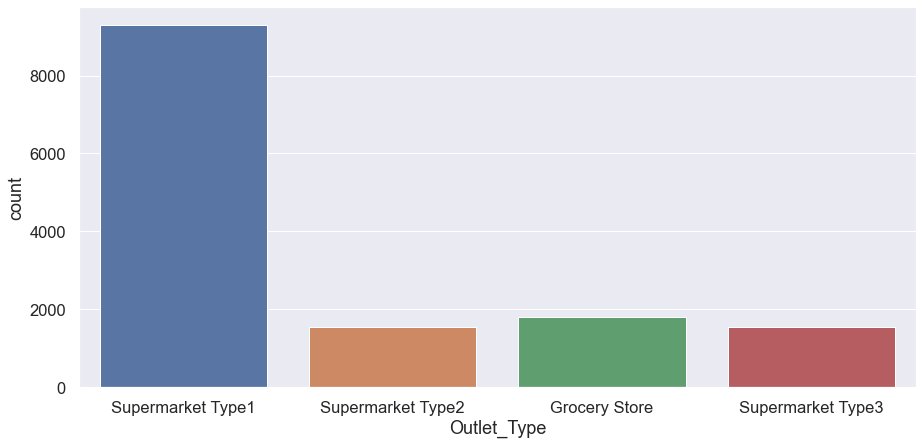

In [155]:
plt.figure(figsize=(15,7))
sns.countplot(data3.Outlet_Type)

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

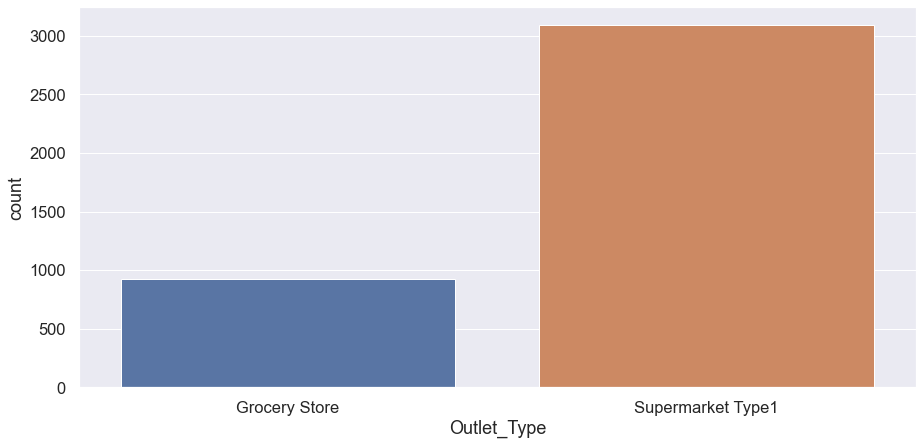

In [156]:
plt.figure(figsize=(15,7))
sns.countplot(data3.loc[data2.Outlet_Size.isna(),'Outlet_Type'])

**Found that Outlet_Type is only two out of 4 labels when Outlet_Size is missing**

**But Supermarket Type 1 is present among those. So label missing in Outlet_Size not because of Outlet_Type**

##### b. Check on 'Outlet_Location_Type'

In [157]:
data3.loc[data3.Outlet_Size=='High','Outlet_Location_Type'].value_counts()

Tier 3    1553
Name: Outlet_Location_Type, dtype: int64

**Check for missing labels in 'Outlet_Location_Type'**

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

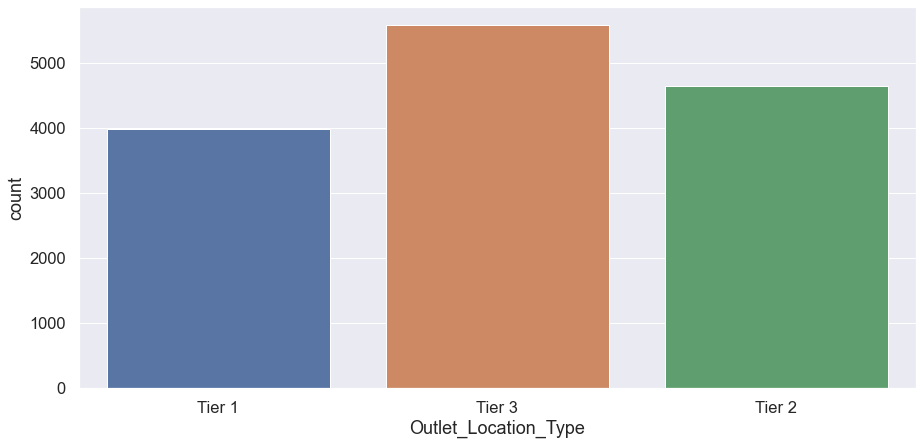

In [158]:
plt.figure(figsize=(15,7))
sns.countplot(data3.Outlet_Location_Type)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

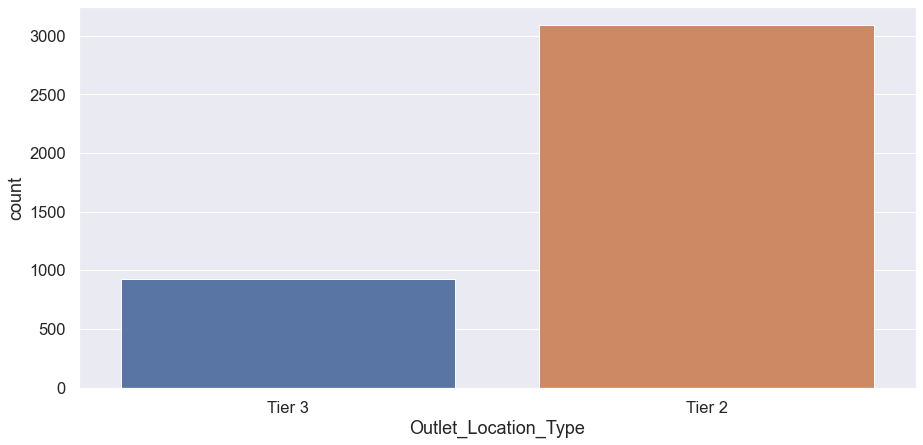

In [159]:
plt.figure(figsize=(15,7))
sns.countplot(data3.loc[data3.Outlet_Size.isna(),'Outlet_Location_Type'])

**Found that Outlet_Location_Type is only two out of 3 labels when Outlet_Size is missing**

**But Tier 3 is present among those. So label missing in Outlet_Size not because of Outlet_Location_Type**

##### c. Check for combination of Outlet_Location_Type and Outlet_Type

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

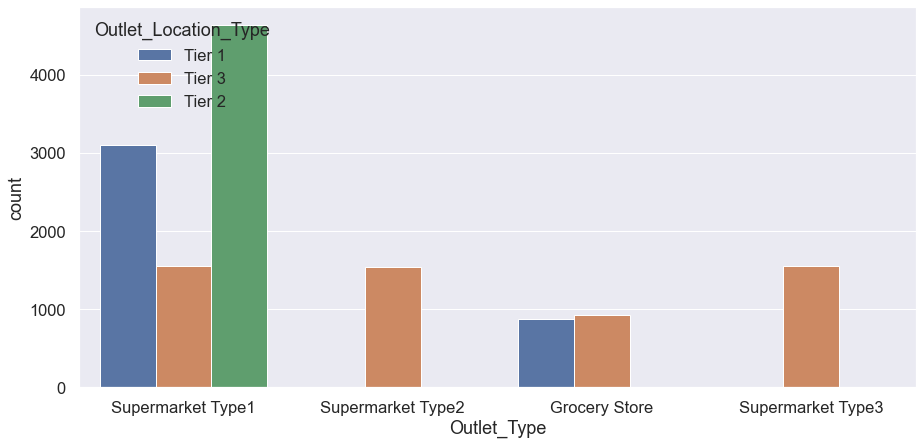

In [160]:
plt.figure(figsize=(15,7))
sns.countplot(data=data3,x='Outlet_Type',hue='Outlet_Location_Type')


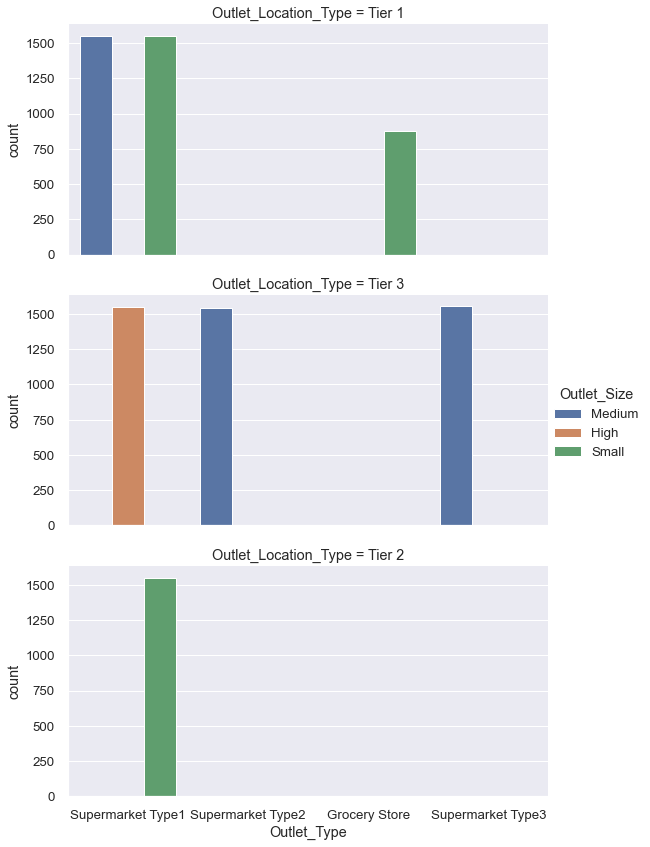

In [161]:
sns.set_theme(font_scale=1.2)
sns.catplot(row='Outlet_Location_Type',x='Outlet_Type', data=data3,kind='count',height=4,hue='Outlet_Size',aspect=2)

*Outlet_Size 'High' only when Outlet_Type is 'Supermarket Type 1' and Outlet_Location_Type is 'Tier 3'*

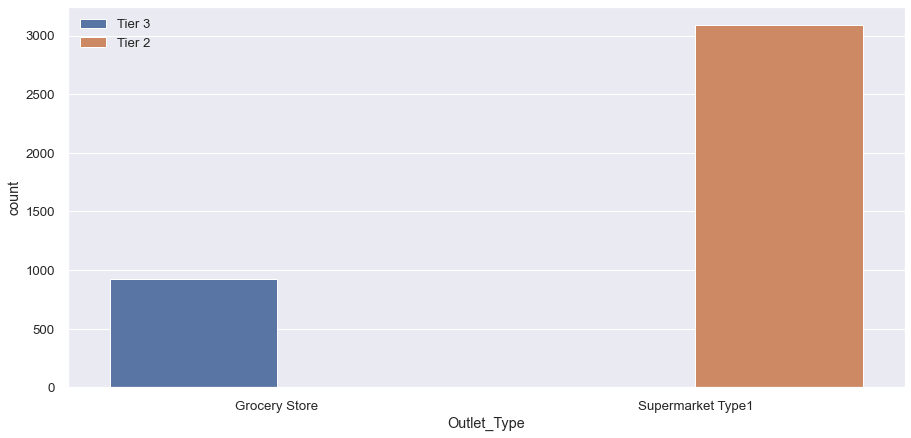

In [162]:
plt.figure(figsize=(15,7))
sns.countplot(data=data3[data3.Outlet_Size.isna()],x='Outlet_Type',hue='Outlet_Location_Type')
plt.legend(loc='upper left')

##### No combination where Outlet_Type is 'Supermarket Type 1' and Outlet_Location_Type is 'Tier 3'

**Therefore label 'High' not predicted**

*Predictions are correct for 'Outlet_Size'*

## Feature Transformation

In [163]:
data5=data4.copy()

In [164]:
skew_df=pd.DataFrame()
for col in data5.select_dtypes(np.number):
    skew=scipy.stats.skew(data5[col])
    skew_df=skew_df.append({'Column':col,'skew':skew,'abs_skewed':abs(skew),'Skewed':abs(skew)>0.5},ignore_index=True)

In [165]:
skew_df

,Column,Skewed,abs_skewed,skew
0,Item_Weight,0.0,0.102385,0.102385
1,Item_Visibility,1.0,1.195049,1.195049
2,Item_MRP,0.0,0.130715,0.130715
3,Outlet_Establishment_Year,0.0,0.396423,-0.396423


**Item_Visibility is skewed among the numerical columns**

In [166]:
data5.Item_Visibility.min()

0.0

*Values contain 0*

### Using Log1p transformation instead of log transform

In [167]:
data5.Item_Visibility=np.log1p(data5.Item_Visibility)

## Target Transformation

In [168]:
scipy.stats.skew(train.Item_Outlet_Sales)

1.1773233539676373

*Target data Skewed*

In [169]:
train.Item_Outlet_Sales.min()

33.29

### Using Log transform

In [170]:
log_y=np.log(train.Item_Outlet_Sales)

## Feature Encoding

In [171]:
data6=data5.copy()

In [172]:
data6=pd.get_dummies(data6,drop_first=True)

In [173]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      14204 non-null  float64
 1   Item_Visibility                  14204 non-null  float64
 2   Item_MRP                         14204 non-null  float64
 3   Outlet_Establishment_Year        14204 non-null  int64  
 4   Item_Fat_Content_Regular         14204 non-null  uint8  
 5   Item_Type_Breads                 14204 non-null  uint8  
 6   Item_Type_Breakfast              14204 non-null  uint8  
 7   Item_Type_Canned                 14204 non-null  uint8  
 8   Item_Type_Dairy                  14204 non-null  uint8  
 9   Item_Type_Frozen Foods           14204 non-null  uint8  
 10  Item_Type_Fruits and Vegetables  14204 non-null  uint8  
 11  Item_Type_Hard Drinks            14204 non-null  uint8  
 12  Item_Type_Health an

## Data Splitting

In [174]:
train.index.max()

8522

In [175]:
train6=data6.iloc[:8523]
test6=data6.iloc[8523:]

## Model Selection

In [176]:
train7=pd.concat([train6,log_y],axis=1)

In [177]:
setup(train7,'Item_Outlet_Sales')

,Description,Value
0,session_id,6367
1,Target,Item_Outlet_Sales
2,Original Data,"(8523, 37)"
3,Missing Values,False
4,Numeric Features,35
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(5966, 35)"


(246     8.143476
 5729    6.161312
 3781    7.359651
 1665    8.203553
 2117    7.778306
           ...   
 2202    6.627622
 1753    7.054874
 38      5.961421
 4715    5.579686
 7055    8.319715
 Name: Item_Outlet_Sales, Length: 5966, dtype: float32,
 'reg-default-name',
 -1,
 False,
 0       8.225540
 1       6.094524
 2       7.648392
 3       6.596300
 4       6.902446
           ...   
 8518    7.929625
 8519    6.308618
 8520    7.084321
 8521    7.520558
 8522    6.640751
 Name: Item_Outlet_Sales, Length: 8523, dtype: float32,
 Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='Item_Outlet_Sales',
                                       time_features=[])

In [178]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.4013,0.2711,0.5206,0.7346,0.0667,0.0584,0.7750
lightgbm,Light Gradient Boosting Machine,0.4112,0.2818,0.5308,0.7240,0.0679,0.0598,0.2220
catboost,CatBoost Regressor,0.4149,0.2859,0.5346,0.7202,0.0683,0.0602,2.4660
lar,Least Angle Regression,0.4167,0.2906,0.5390,0.7155,0.0691,0.0607,0.0480
br,Bayesian Ridge,0.4167,0.2906,0.5390,0.7155,0.0691,0.0607,0.0350
lr,Linear Regression,0.4167,0.2906,0.5390,0.7155,0.0691,0.0607,2.5080
ridge,Ridge Regression,0.4167,0.2906,0.5390,0.7155,0.0691,0.0607,0.0320
huber,Huber Regressor,0.4151,0.2961,0.5440,0.7101,0.0700,0.0610,0.6850
rf,Random Forest Regressor,0.4262,0.3014,0.5489,0.7050,0.0701,0.0617,2.8270
xgboost,Extreme Gradient Boosting,0.4344,0.3143,0.5605,0.6926,0.0716,0.0630,0.9960


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=6367, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [179]:
gbr=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=3923, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## Prediction

In [180]:
gbr.fit(train6,log_y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=3923, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [181]:
log_pred=gbr.predict(test6)
pred=np.exp(log_pred)

## Submission

In [182]:
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [183]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Item_Identifier    5681 non-null   object
 1   Outlet_Identifier  5681 non-null   object
 2   Item_Outlet_Sales  5681 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 133.3+ KB


In [184]:
pred

array([1480.62685078, 1268.47592525,  543.05517546, ..., 1638.09047841,
       3516.85629145, 1148.99244838])

In [185]:
len(pred)

5681

In [186]:
sample['Item_Outlet_Sales']=pred

In [187]:
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1480.626851
1,FDW14,OUT017,1268.475925
2,NCN55,OUT010,543.055175
3,FDQ58,OUT017,2328.201400
4,FDY38,OUT027,5384.530288
